In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn










   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

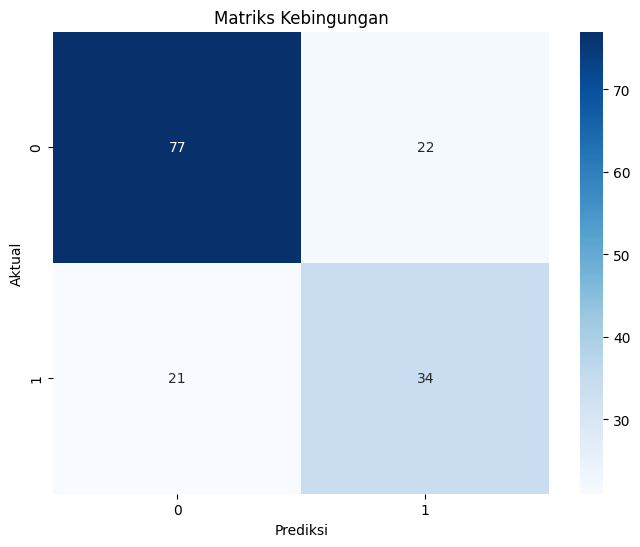

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset
file_path = "diabetes.csv"  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Memeriksa data
print(data.head())
print(data.info())

# Memisahkan fitur dan label
fitur = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
label = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Membagi dataset menjadi pelatihan dan pengujian
fitur_latih, fitur_uji, label_latih, label_uji = train_test_split(fitur, label, test_size=0.2, random_state=42)

# Membuat model Random Forest
model_hutan_acak = RandomForestClassifier(n_estimators=100, random_state=42)
model_hutan_acak.fit(fitur_latih, label_latih)

# Prediksi
label_prediksi = model_hutan_acak.predict(fitur_uji)

# Evaluasi
akurasi = accuracy_score(label_uji, label_prediksi)
print("Akurasi:", akurasi)
print("\nLaporan Klasifikasi:\n", classification_report(label_uji, label_prediksi))

# Matriks Kebingungan
matriks_kebingungan = confusion_matrix(label_uji, label_prediksi)
plt.figure(figsize=(8, 6))
sns.heatmap(matriks_kebingungan, annot=True, fmt='d', cmap='Blues', xticklabels=model_hutan_acak.classes_, yticklabels=model_hutan_acak.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Kebingungan')
plt.show()
